In [3]:
import pandas as pd
from numpy import random
%matplotlib inline 

In [9]:
random.seed(3)

num_simulation = 1000
num_throw = 10
throw = ['missed', 'made']
prob = [0.3, 0.7]

monte_carlo = pd.DataFrame()

for n in range(num_simulation):
    
    throws = []
    
    for i in range(num_throw):
        
        result = random.choice(throw, p=prob)
        throws.append(result)
    
    monte_carlo[f"Simulation{n}"] = pd.Series(throws)

monte_carlo


,Simulation0,Simulation1,Simulation2,Simulation3,Simulation4,Simulation5,Simulation6,Simulation7,Simulation8,Simulation9,...,Simulation990,Simulation991,Simulation992,Simulation993,Simulation994,Simulation995,Simulation996,Simulation997,Simulation998,Simulation999
0,made,missed,missed,made,made,missed,made,made,missed,made,...,made,made,missed,missed,made,made,made,missed,made,missed
1,made,made,made,made,made,missed,made,made,made,made,...,missed,made,missed,made,missed,made,missed,missed,missed,made
2,missed,made,made,made,missed,made,made,made,missed,made,...,made,made,made,missed,made,made,made,made,missed,missed
3,made,missed,missed,made,missed,missed,made,made,made,made,...,made,made,made,made,made,made,made,made,made,made
4,made,made,made,made,made,made,made,made,made,made,...,made,made,made,made,missed,made,made,made,missed,made
5,made,made,made,missed,made,made,made,missed,made,made,...,made,missed,made,made,made,made,missed,made,made,missed
6,missed,missed,made,made,made,made,missed,missed,made,made,...,made,made,missed,made,made,missed,missed,made,missed,made
7,missed,made,missed,made,missed,made,missed,missed,missed,made,...,made,missed,made,made,made,missed,made,missed,made,missed
8,missed,missed,made,made,missed,made,made,missed,made,made,...,made,missed,missed,made,made,made,made,made,made,made
9,made,made,made,missed,made,made,missed,missed,made,missed,...,missed,made,missed,made,missed,made,made,made,missed,made


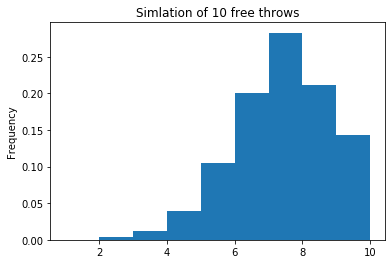

In [15]:
freq_dist_df = pd.DataFrame()
missed = []
made = []

for col in monte_carlo.columns:
    
    value_counts = monte_carlo[col].value_counts()
    
    if 'missed' in value_counts.index and 'made' in value_counts.index: 
        missed.append(value_counts['missed'])
        made.append(value_counts['made'])
    
    elif 'missed' not in value_counts.index: 
        missed.append(0)
        made.append(value_counts['made'])
    
    elif 'made' not in value_counts.index: 
        made.append(0)
        missed.append(value_counts['missed'])
        
freq_dist_df['missed'] = missed
freq_dist_df['made'] = made

freq_dist_df

freq_dist_df['made'].plot.hist(density=True, title=f"Simlation of {num_throw} free throws", bins=[1,2,3,4,5,6,7,8,9,10])
    
        

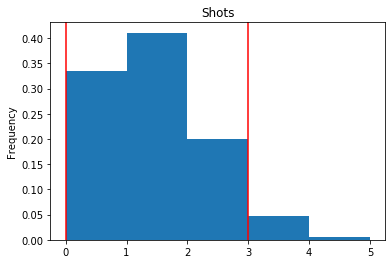

In [23]:
# beginner archer

shot_simulations = 1000
num_shots = 5
shot = ['hit', 'missed']
shot_probs = [0.2, 0.8]
shot_monte_carlo = pd.DataFrame()

for n in range(shot_simulations): 
    
    shots = []
    
    for i in range(num_shots): 
        
        result = random.choice(shot, p=shot_probs)
        shots.append(result)
        
    shot_monte_carlo[f"Simulation{n}"] = pd.Series(shots)
    

# shot_monte_carlo

shot_fre_dist = pd.DataFrame()
shot_hit = []
shot_missed = []

for col in shot_monte_carlo.columns: 
    value_counts = shot_monte_carlo[col].value_counts()
    if 'hit' in value_counts.index and 'missed' in value_counts.index: 
        shot_hit.append(value_counts['hit'])
        shot_missed.append(value_counts['missed'])
    elif 'hit' not in value_counts.index: 
        shot_hit.append(0)
        shot_missed.append(value_counts['missed'])
    elif 'missed' not in value_counts.index: 
        shot_hit.append(value_counts['hit'])
        shot_missed.append(0)

shot_fre_dist['hit'] = shot_hit
shot_fre_dist['missed'] = shot_missed

ci = shot_fre_dist['hit'].quantile(q=[0.025, 0.975])

plt = shot_fre_dist['hit'].plot.hist(density=True, title="Shots", bins=[0,1,2,3,4,5])
plt.axvline(ci.iloc[0], color='r')
plt.axvline(ci.iloc[1], color='r')
        

In [1]:
# Financial Forecasting

import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
%matplotlib inline

from dotenv import load_dotenv
load_dotenv()

True

In [36]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')
assets = api.list_assets()

tradable = [a for a in assets if a.tradable]

ticker = 'AAPL'

timeframe = '1D'

start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()

df = api.get_barset(ticker, 
                   timeframe,
                   limit = None,
                   start = start_date,
                   end = end_date, 
                   after = None, 
                   until = None).df

df.drop(columns = ['open', 'high', 'low', 'volume'], level=1, inplace=True)

last_px = df['AAPL']['close'][-1]
avg = df['AAPL']['close'].mean()
std = df['AAPL']['close'].std()

sim_pxs = [last_px]

days = 252

for i in range(days):
    
    px = round(sim_pxs[-1] * (1 + np.random.normal(avg, std)),3)
    sim_pxs.append(px)
    
sim_pxs_df = pd.DataFrame({'Simulate AAPL Price': sim_pxs})

sim_pxs_df.head(5)
# sim_pxs_df.plot()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply


,Simulate AAPL Price
0,2.933700e+02
1,3.829300e+04
2,6.166394e+06
3,7.529743e+08
4,1.425614e+11
